In [1]:
% matplotlib inline

import pickle
from collections import OrderedDict, Iterable

from matplotlib import pyplot

from compare import layers_correlation_meanstd


def plot_layer_correlations(filepaths, reverse=False):
    if not isinstance(filepaths, Iterable):
        filepaths = [filepaths]
    for filepath in filepaths:
        with open(filepath, 'rb') as file:
            data = pickle.load(file)
        layer_metrics, args = data['layer_metrics'], data['args']
        if reverse:
            layer_metrics = OrderedDict(reversed(list(layer_metrics.items())))
        means, stds = layers_correlation_meanstd(layer_metrics)

        x = range(len(layer_metrics))
        pyplot.errorbar(x, means, yerr=stds, label='%s %s' % (args.region, args.variance))
        pyplot.xticks(x, layer_metrics.keys(), rotation='vertical')
    pyplot.legend()


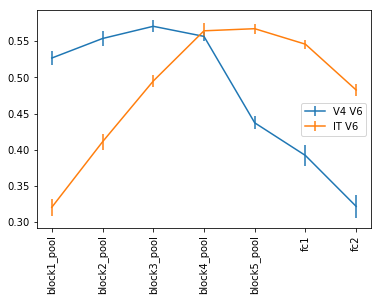

In [2]:
plot_layer_correlations(['images/sorted/vgg16-activations-correlations-region_V4-variance_V6.pkl', 
                        'images/sorted/vgg16-activations-correlations-region_IT-variance_V6.pkl'])

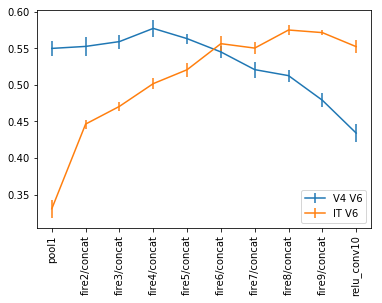

In [3]:
plot_layer_correlations(['images/sorted/squeezenet-activations-correlations-region_V4-variance_V6.pkl', 
                        'images/sorted/squeezenet-activations-correlations-region_IT-variance_V6.pkl'], 
                        reverse=True)

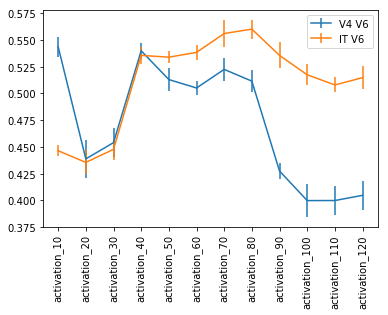

In [4]:
plot_layer_correlations(['images/sorted/densenet-activations-correlations-region_V4-variance_V6.pkl',
                         'images/sorted/densenet-activations-correlations-region_IT-variance_V6.pkl'])

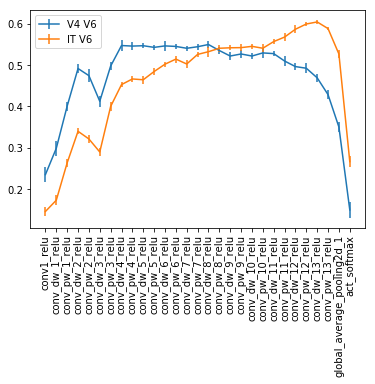

In [6]:
plot_layer_correlations(['images/sorted/mobilenet-activations-correlations-region_V4-variance_V6.pkl',
                         'images/sorted/mobilenet-activations-correlations-region_IT-variance_V6.pkl'])

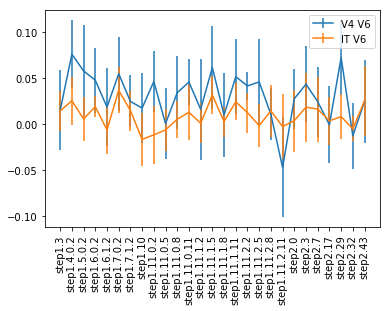

In [7]:
plot_layer_correlations(['images/sorted/Chairs/marrnet-activations-correlations-region_V4-variance_V6.pkl', 
                         'images/sorted/Chairs/marrnet-activations-correlations-region_IT-variance_V6.pkl'])